In [3]:
## Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
# Load mtcars dataset from CSV
df = pd.read_csv("mtcars.csv")

In [5]:
# Features (exclude 'model' and 'am'), Target = 'am'
X = df.drop(columns=["model", "am"])
y = df["am"]

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
## Step 2: Train the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [12]:
## Step 3: Model Evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143

Confusion Matrix:
 [[3 1]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



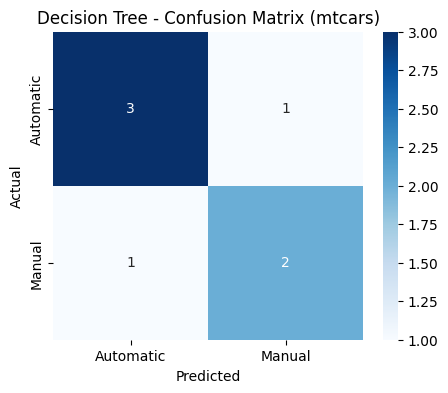

In [13]:
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Automatic","Manual"],
            yticklabels=["Automatic","Manual"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix (mtcars)")
plt.show()

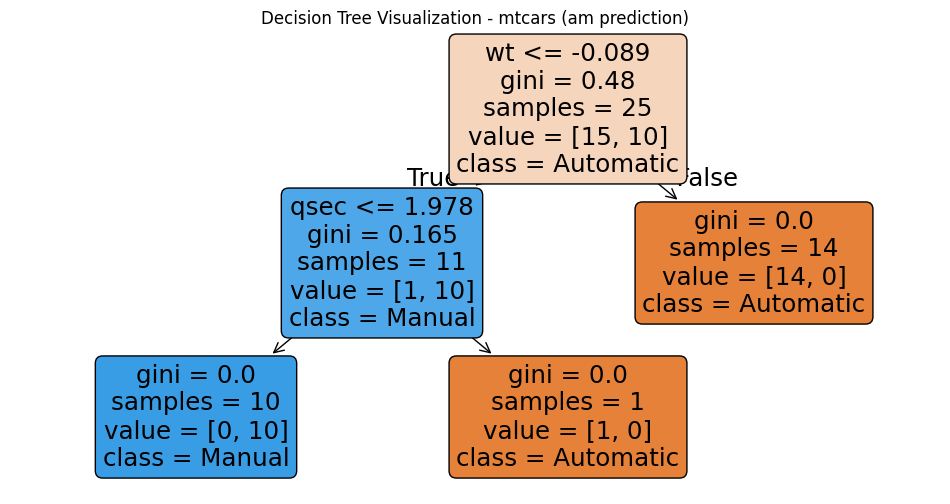

In [14]:
# Plot the Decision Tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=["Automatic","Manual"],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization - mtcars (am prediction)")
plt.show()